<a href="https://colab.research.google.com/github/Ashi743/deep-learning-/blob/main/CNN_dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 265MB/s]
100% 1.06G/1.06G [00:04<00:00, 254MB/s]


In [3]:
#unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten , BatchNormalization, Dropout

In [5]:
# generators  to process large  amount data
train_ds= keras.utils.image_dataset_from_directory(
    directory= "/content/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    )

val_ds= keras.utils.image_dataset_from_directory(
    directory= "/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#above data in np.array
#normalize px values
def process(image, label):
  image= tf.cast(image/255. , tf.float32)
  return image, label

train_ds= train_ds.map(process)
val_ds= val_ds.map(process)

In [7]:
#cnn model
# 32,64,128 filters
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history=model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 94ms/step - accuracy: 0.6008 - loss: 0.6554 - val_accuracy: 0.7780 - val_loss: 0.4742
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7798 - loss: 0.4656 - val_accuracy: 0.7960 - val_loss: 0.4397
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 72ms/step - accuracy: 0.8271 - loss: 0.3702 - val_accuracy: 0.7978 - val_loss: 0.4407
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.8919 - loss: 0.2530 - val_accuracy: 0.7962 - val_loss: 0.5670
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9437 - loss: 0.1440 - val_accuracy: 0.8006 - val_loss: 0.8228
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9637 - loss: 0.0898 - val_accuracy: 0.7970 - val_loss: 0.9611
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.9805 - loss: 0.0612 - val_accuracy: 0.7884 - val_loss: 1.0160
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9800 - loss: 0.0617 - 

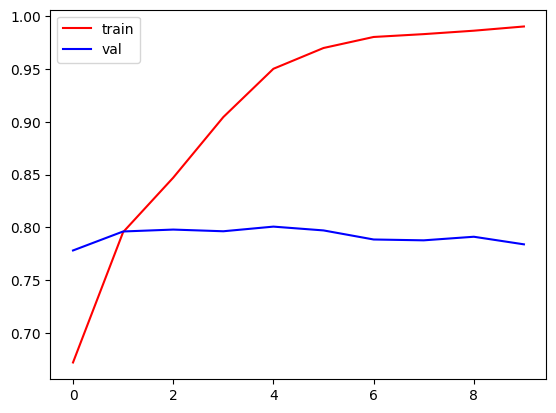

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='val')
plt.legend()
plt.show()

In [12]:
# above overfitting so we use dropout or batch norm

In [14]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history=model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.6324 - loss: 0.6474 - val_accuracy: 0.7140 - val_loss: 0.5692
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7214 - loss: 0.5440 - val_accuracy: 0.7598 - val_loss: 0.5003
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 109ms/step - accuracy: 0.7863 - loss: 0.4597 - val_accuracy: 0.6244 - val_loss: 0.8522
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.8092 - loss: 0.4198 - val_accuracy: 0.7956 - val_loss: 0.4668
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - accuracy: 0.8750 - loss: 0.2879 - val_accuracy: 0.7012 - val_loss: 0.6102
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9077 - loss: 0.2291 - val_accuracy: 0.7932 - val_loss: 0.6122
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9337 - loss: 0.1617 - val_accuracy: 0.8206 - val_loss: 0.4750
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9453 - loss: 0.1361 -

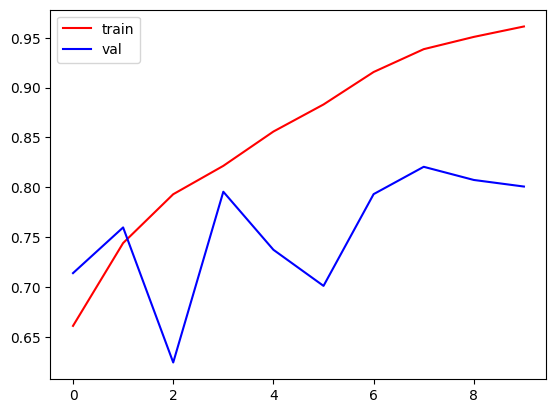

In [19]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='val')
plt.legend()
plt.show()

In [ ]:
#predict

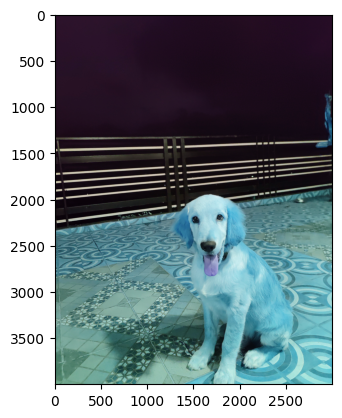

In [20]:
import cv2
test_img = cv2.imread('/content/IMG_20240924_185006.jpg')
plt.imshow(test_img)

In [22]:
test_img.shape

(4000, 3000, 3)

In [23]:
test_img= cv2.resize(test_img, (256,256))
test_input= test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step


array([[0.]], dtype=float32)

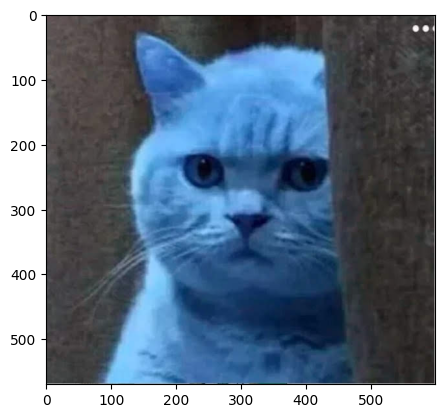

In [25]:
cat_img= cv2.imread('/content/IMG-20200406-WA0002.jpg')
plt.imshow(cat_img)

In [26]:
cat_img.shape

(570, 599, 3)

In [27]:
cat_test= cv2.resize(cat_img, (256,256))
cat_test= cat_test.reshape((1,256,256,3))

In [28]:
model.predict(cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)

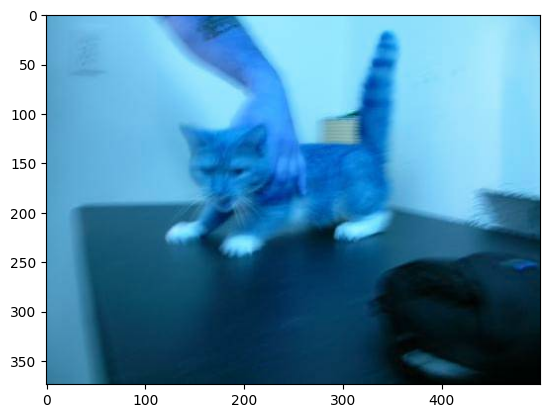

In [41]:
# check
cat_img_2= cv2.imread('/content/cat.0.jpg')
plt.imshow(cat_img_2)

In [42]:
cat_img_2.shape

(374, 500, 3)

In [43]:
cat_test= cv2.resize(cat_img_2, (256,256))
cat_test= cat_test.reshape((1,256,256,3))

In [44]:
model.predict(cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.]], dtype=float32)